In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 국가별 자살 Data

In [2]:
df=pd.read_csv('master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


column name을 정리하고, 대부분이 null값인 HDI for year은 drop   
gdp값을 str에서 float으로 변경

In [5]:
suicide = df.rename(columns={' gdp_for_year ($) ': 'gdp_for_year', 'gdp_per_capita ($)': 'gdp_per_capita'})
suicide = suicide.drop(['HDI for year'], axis=1)
suicide['gdp_for_year'] = suicide['gdp_for_year'].str.replace(',','').astype('float')
suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,2.156625e+09,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,2.156625e+09,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,2.156625e+09,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,2.156625e+09,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,2.156625e+09,796,Boomers


## 시대별 자살률
   
   
시대별 자살률 확인   
시대 순서: 'G.I. Generation' - 'Silent' - 'Boomers' - 'X' - 'millenials' - 'Z'


In [6]:
suicide.generation.value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

In [7]:
generation = suicide.groupby('generation')[['suicides_no', 'population']].sum().reset_index()
generation['suicides/100k pop'] = (generation['suicides_no']/generation['population'])*100000

In [8]:
def gen_order(x):
    if x=='G.I. Generation':
        return 1
    elif x=='Silent':
        return 2
    elif x=='Boomers':
        return 3
    elif x=='Generation X':
        return 4
    elif x=='Millenials':
        return 5
    elif x=='Generation Z':
        return 6
func = np.vectorize(gen_order)
gen_ordering = func(generation['generation'])
generation['order'] = gen_ordering

In [9]:
order_generation = generation.sort_values(by='order').reset_index().drop(['index'],axis=1)
order_generation

,generation,suicides_no,population,suicides/100k pop,order
0,G.I. Generation,510009,2126202724,23.986847,1
1,Silent,1781744,9220331647,19.324077,2
2,Boomers,2284498,13350511729,17.111689,3
3,Generation X,1532804,13472109292,11.377610,4
4,Millenials,623459,10649461202,5.854371,5
5,Generation Z,15906,2503541842,0.635340,6


Text(0.5, 1.0, '( suicides/100k pop )  by Generation')

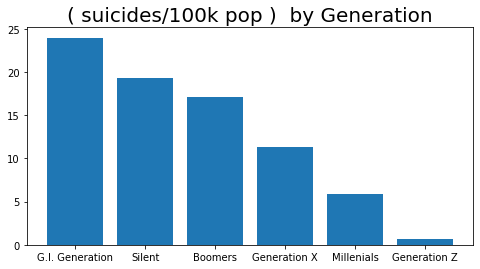

In [10]:
plt.figure(figsize=(8,4))
plt.bar(order_generation['generation'], order_generation['suicides/100k pop'])
plt.title('( suicides/100k pop )  by Generation', size=20)

시대가 지날수록 자살율은 급격히 떨어지고 있다.   
GDP가 높은 국가에서도 그럴까?   
   
각 시대별 GDP top10 국가들의 자살율을 확인

In [14]:
gen_gdp = suicide.groupby(['generation', 'country'])['suicides_no', 'population', 'gdp_for_year'].sum().reset_index()
gen_gdp

<ipython-input-14-795b864be584>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gen_gdp = suicide.groupby(['generation', 'country'])['suicides_no', 'population', 'gdp_for_year'].sum().reset_index()


,generation,country,suicides_no,population,gdp_for_year
0,Boomers,Albania,577,16533444,2.133056e+11
1,Boomers,Antigua and Barbuda,7,522668,4.760262e+10
2,Boomers,Argentina,18955,234772269,1.798203e+13
3,Boomers,Armenia,661,21149918,2.642440e+11
4,Boomers,Aruba,39,402143,5.655885e+10
...,...,...,...,...,...
585,Silent,United Arab Emirates,24,1196698,6.077836e+12
586,Silent,United Kingdom,31262,386306690,1.602544e+14
587,Silent,United States,228971,1532558933,9.134919e+14
588,Silent,Uruguay,4117,17099261,1.754987e+12


In [15]:
gi_gdp_top = gen_gdp[gen_gdp['generation']=='G.I. Generation'].sort_values(by='gdp_for_year', ascending=False).head(10)
sil_gdp_top = gen_gdp[gen_gdp['generation']=='Silent'].sort_values(by='gdp_for_year', ascending=False).head(10)
boom_gdp_top = gen_gdp[gen_gdp['generation']=='Boomers'].sort_values(by='gdp_for_year', ascending=False).head(10)
x_gdp_top = gen_gdp[gen_gdp['generation']=='Generation X'].sort_values(by='gdp_for_year', ascending=False).head(10)
y_gdp_top = gen_gdp[gen_gdp['generation']=='Millenials'].sort_values(by='gdp_for_year', ascending=False).head(10)
z_gdp_top = gen_gdp[gen_gdp['generation']=='Generation Z'].sort_values(by='gdp_for_year', ascending=False).head(10)

frames = [gi_gdp_top, sil_gdp_top, boom_gdp_top, x_gdp_top, y_gdp_top, z_gdp_top]
gen_gdp_top = pd.concat(frames).reset_index().drop('index', axis=1)

In [16]:
sui_gdp_top = gen_gdp_top.groupby('generation')[['suicides_no', 'population']].sum().reset_index()
sui_gdp_top['suicides/100k pop'] = (sui_gdp_top['suicides_no']/sui_gdp_top['population'])*100000
sui_gdp_top['order'] = gen_ordering
sui_gdp_top=sui_gdp_top.sort_values(by='order')
sui_gdp_top

,generation,suicides_no,population,suicides/100k pop,order
1,G.I. Generation,327294,1434709261,22.812566,1
5,Silent,1195585,5967231016,20.035842,2
0,Boomers,1498116,8022465826,18.674009,3
2,Generation X,937911,7392885579,12.686670,4
4,Millenials,359327,5389789935,6.666809,5
3,Generation Z,7127,1210791300,0.588623,6


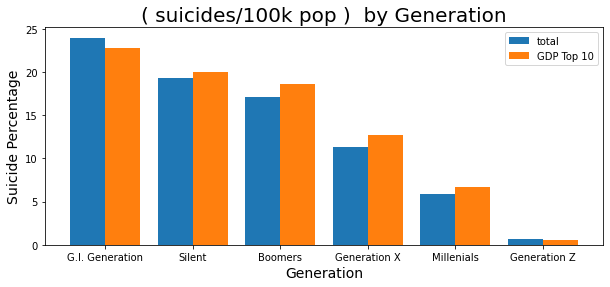

In [52]:
plt.figure(figsize=(10,4))

xbar=np.arange(len(sui_gdp_top['generation']))-0.2
xbar2=xbar+0.4
xcol=['G.I. Generation', 'Silent', 'Boomers', 'Generation X', 'Millenials', 'Generation Z']

plt.bar(xbar, order_generation['suicides/100k pop'], width=0.4, label='total')
plt.bar(xbar2, sui_gdp_top['suicides/100k pop'], width=0.4, label='GDP Top 10')

plt.title('( suicides/100k pop )  by Generation', size=20)
plt.xticks(xbar+0.2, xcol)
plt.xlabel('Generation', size=14)
plt.ylabel('Suicide Percentage', size=14)
plt.legend()

## 2000년 이후 자살률이 가장 높은 국가

In [18]:
country = suicide.groupby(['country','year'])[['suicides_no', 'population']].sum().reset_index()
over2000 = country[country['year']>=2000]
over2000['suicides/100k pop']=(over2000['suicides_no']/over2000['population'])*100000
total_over2000 = over2000.groupby('country')[['suicides_no', 'population']].mean().reset_index()
total_over2000['suicides/100k pop']=(total_over2000['suicides_no']/total_over2000['population'])*100000
country_rank = total_over2000.sort_values(by='suicides/100k pop', ascending=False).head(10).reset_index().drop('index',axis=1)
country_rank

<ipython-input-18-e17843b54540>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  over2000['suicides/100k pop']=(over2000['suicides_no']/over2000['population'])*100000


,country,suicides_no,population,suicides/100k pop
0,Lithuania,1169.882353,3.016129e+06,38.787538
1,Russian Federation,40564.125000,1.357442e+08,29.882772
2,Belarus,2715.181818,9.210263e+06,29.479960
3,Guyana,188.384615,6.699171e+05,28.120587
4,Kazakhstan,3841.750000,1.441166e+07,26.657233
5,Hungary,2470.470588,9.479006e+06,26.062550
6,Republic of Korea,12177.937500,4.675586e+07,26.045797
7,Sri Lanka,4541.200000,1.744388e+07,26.033195
8,Latvia,521.000000,2.067646e+06,25.197734
9,Slovenia,478.062500,1.927682e+06,24.799858


Text(0.5, 1.0, ' ( suicides/100k pop ) by Year')

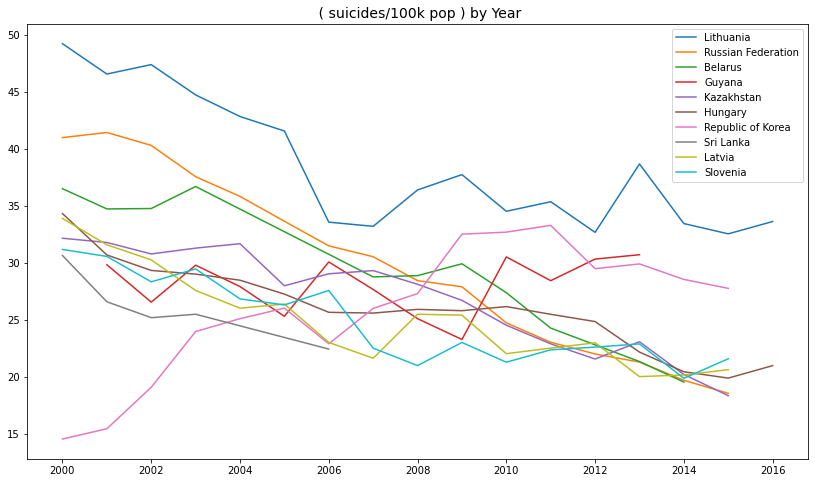

In [21]:
plt.figure(figsize=(14,8))
for i in country_rank['country']:
    plt.plot(over2000[over2000['country']==i]['year'], over2000[over2000['country']==i]['suicides/100k pop'], label=i)
plt.legend()
plt.title(' ( suicides/100k pop ) by Year', size=14)

전체적으로 자살률이 감소하고 있지만, 증가(한국)하거나 유지(구야나)되는 국가도 있다.

## 한국의 자살률

In [34]:
korea = suicide[suicide['country']=='Republic of Korea']
korea_year = korea.groupby('year')[['suicides_no','population']].sum().reset_index()
korea_year['suicides/100k pop'] = (korea_year['suicides_no']/korea_year['population'])*100000
korea_year

,year,suicides_no,population,suicides/100k pop
0,1985,3689,36716700,10.047199
1,1986,3458,37540400,9.211410
2,1987,3301,38114900,8.660655
3,1988,2949,38700500,7.620057
4,1989,3023,39171500,7.717346
5,1990,3159,39589500,7.979388
6,1991,3069,39993700,7.673709
7,1992,3533,40371200,8.751288
8,1993,4124,40754800,10.119053
9,1994,4212,41145300,10.236892


Text(0.5, 1.0, 'Suicide Percentage in Korea')

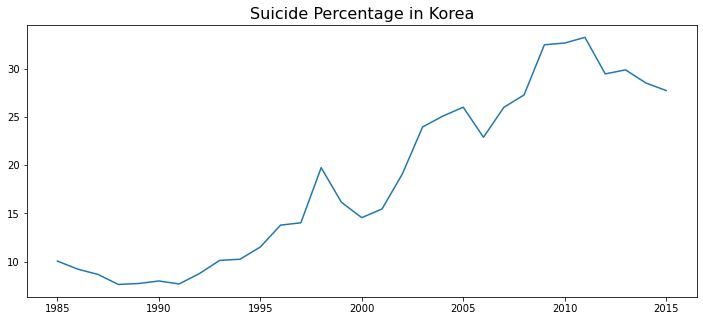

In [32]:
plt.figure(figsize=(12,5))
plt.plot(korea_year['year'], korea_year['suicides/100k pop'])
plt.title('Suicide Percentage in Korea', size=16)

90년대 후반, 자살률이 peak를 보인 것은 IMF의 영향인듯   
저 시기(1998년, suicides/100k pop = 19.746)의 데이터 확인   

In [33]:
korea_1998 = korea[korea['year']==1998]
korea_1998

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year,gdp_per_capita,generation
20386,Republic of Korea,1998,male,75+ years,258,316200,81.59,Republic of Korea1998,3.742414e+11,8624,G.I. Generation
20387,Republic of Korea,1998,male,55-74 years,1398,2550700,54.81,Republic of Korea1998,3.742414e+11,8624,Silent
20388,Republic of Korea,1998,male,35-54 years,2644,6568200,40.25,Republic of Korea1998,3.742414e+11,8624,Boomers
20389,Republic of Korea,1998,female,75+ years,230,684600,33.60,Republic of Korea1998,3.742414e+11,8624,G.I. Generation
20390,Republic of Korea,1998,male,25-34 years,1240,4604300,26.93,Republic of Korea1998,3.742414e+11,8624,Generation X
20391,Republic of Korea,1998,male,15-24 years,629,4166000,15.10,Republic of Korea1998,3.742414e+11,8624,Generation X
20392,Republic of Korea,1998,female,55-74 years,479,3195400,14.99,Republic of Korea1998,3.742414e+11,8624,Silent
20393,Republic of Korea,1998,female,25-34 years,533,4381500,12.16,Republic of Korea1998,3.742414e+11,8624,Generation X
20394,Republic of Korea,1998,female,35-54 years,714,6323400,11.29,Republic of Korea1998,3.742414e+11,8624,Boomers
20395,Republic of Korea,1998,female,15-24 years,371,3956800,9.38,Republic of Korea1998,3.742414e+11,8624,Generation X


In [36]:
male = korea_1998[korea_1998['sex']=='male']
female = korea_1998[korea_1998['sex']=='female']

([<matplotlib.axis.XTick at 0x2d89b612eb0>,
 [Text(0.0, 0, '75+ years'),
  Text(1.0, 0, '55-74 years'),
  Text(2.0, 0, '35-54 years'),
  Text(3.0, 0, '25-34 years'),
  Text(4.0, 0, '15-24 years'),
  Text(5.0, 0, '5-14 years')])

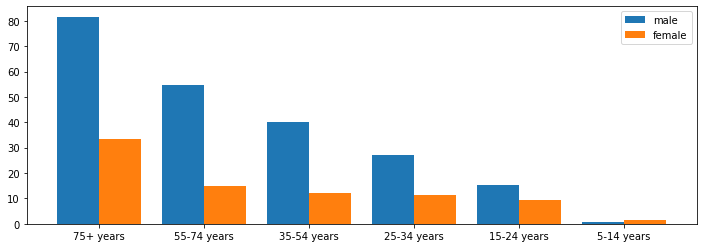

In [62]:
plt.figure(figsize=(12,4))

xbar=np.arange(len(korea_1998['age'].unique()))-0.2
xbar2=xbar+0.4
xcol=korea_1998['age'].unique()

plt.bar(xbar, korea_1998[korea_1998['sex']=='male']['suicides/100k pop'], width=0.4, label='male')
plt.bar(xbar2, korea_1998[korea_1998['sex']=='female']['suicides/100k pop'], width=0.4, label='female')
plt.legend()
plt.xticks(xbar+0.2, xcol)

#### 1998년도 데이터를 1997년, 1999년 데이터와 비교

In [67]:
kor_1998 = korea_1998[['year','sex','age','suicides_no']]
kor_1998 = kor_1998.rename(columns={'suicides_no': 'suicides_1998'})

In [69]:
kor_1997 = korea[korea['year']==1997][['year','sex','age','suicides_no']]
kor_1997 = kor_1997.rename(columns={'suicides_no': 'suicides_1997'})

In [72]:
kor_1999 = korea[korea['year']==1999][['year','sex','age','suicides_no']]
kor_1999 = kor_1999.rename(columns={'suicides_no': 'suicides_1999'})

In [89]:
kor_9798 = pd.merge(kor_1997, kor_1998, on=['sex','age'])
total = pd.merge(kor_9798, kor_1999, on=['sex','age'])
total = total.drop(['year', 'year_x', 'year_y'], axis=1)
total = total.sort_values(by='suicides_1998', ascending=False)

In [91]:
total_male = total[total['sex']=='male']
total_female = total[total['sex']=='female']

Text(0.5, 1.0, 'Male Suicides in Korea (1997-1999)')

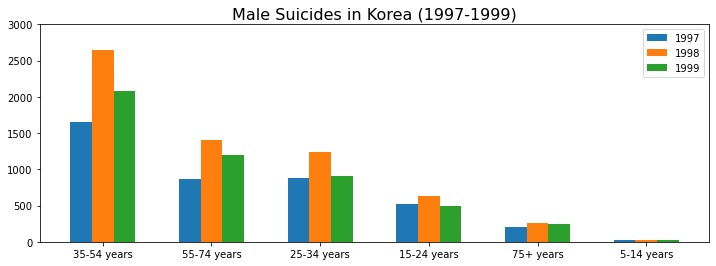

In [99]:
plt.figure(figsize=(12,4))

xbar=np.arange(len(total_male['age'].unique()))
xbar2=xbar-0.2
xbar3=xbar+0.2
xcol=total_male['age'].unique()

plt.bar(xbar2, total_male['suicides_1997'], width=0.2, label='1997')
plt.bar(xbar, total_male['suicides_1998'], width=0.2, label='1998')
plt.bar(xbar3, total_male['suicides_1999'], width=0.2, label='1999')

plt.legend()
plt.xticks(xbar, xcol)
plt.ylim(0,3000)
plt.title('Male Suicides in Korea (1997-1999)', size=16)

Text(0.5, 1.0, 'Female Suicides in Korea (1997-1999)')

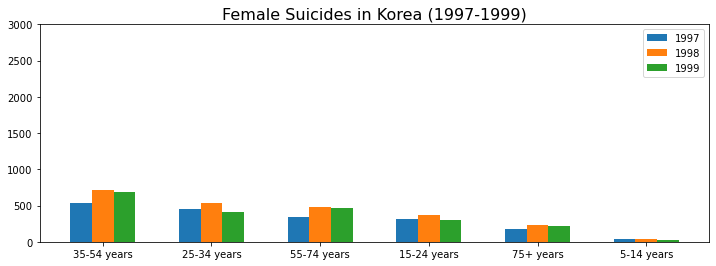

In [100]:
plt.figure(figsize=(12,4))

xbar=np.arange(len(total_female['age'].unique()))
xbar2=xbar-0.2
xbar3=xbar+0.2
xcol=total_female['age'].unique()

plt.bar(xbar2, total_female['suicides_1997'], width=0.2, label='1997')
plt.bar(xbar, total_female['suicides_1998'], width=0.2, label='1998')
plt.bar(xbar3, total_female['suicides_1999'], width=0.2, label='1999')

plt.legend()
plt.xticks(xbar, xcol)
plt.ylim(0,3000)
plt.title('Female Suicides in Korea (1997-1999)', size=16)